In [1]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs1 import *

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#cohort = 'basel'
cohort = 'eddy'
ss = 10

In [3]:
if cohort == 'eddy':

    analysisProteins = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS']

    pretty_printing = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS', 'size']
else:
    analysisProteins = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'Carbonic_Anhydrase_IX',
       'Cytokeratin19', 'Cytokeratin5', 'Cytokeratin7', 'Cytokeratin8/18',
       'DNA1', 'DNA2', 'EGFR', 'Ecadherin', 'EpCAM', 'Erk1/2', 'Fibronectin',
       'GATA3', 'H3K27me3', 'Keratin14', 'Ki67', 'Progesterone_Receptor_A/B',
       'RabbitIgGHL', 'S6', 'SMA', 'Slug', 'Sox9', 'TotalHH3', 'Twist', 
       'Vimentin', 'bCatenin', 'cMyc', 'cerbB2_Her2', 'cleavedPARP_CleavedCaspase3',
       'mTOR', 'p53', 'panCytokeratin/Keratin_Epithelial', 'phospho_HH3', 'vWF_CD31']

    pretty_printing = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'CAIX', 
                    'CK19', 'CK5', 'CK7', 'CK8/18', 
                    'DNA1', 'DNA2', 'EGFR', 'ECadherin', 'EpCAM', 'Erk', 'Fibronectin', 
                    'GATA3', 'H3K27me3', 'CK14', 'Ki67', 'PR', 
                    'Estroge', 'S6', 'SMA', 'Slug', 'Sox9', 'TotHH3', 'Twist',
                    'Vimentin', 'bCatenin', 'cMyc', 'Her2', 'cleavedPARP', 
                    'mTOR', 'p53', 'panCK', 'phosHH3', 'vWF', 'size'] 

#tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
#te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))
#te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [4]:
#trY, trS, _, _, _ = prepData(tr_exp, 2, analysisProteins)

In [5]:
thresholds = pd.DataFrame(np.quantile(tr_exp[:,analysisProteins].X, [0.25, 0.75], axis=0), columns = pretty_printing[:-1])

In [6]:
thresholds

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PDL1,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS
0,0.375000,1.690476,1.342857,0.208333,0.166667,0.333333,2.243243,1.365079,0.033333,0.571429,...,0.685185,0.191489,0.090909,1.315789,0.068182,3.076923,0.200000,4.036397,0.351351,0.142857
1,3.647059,4.321883,2.620690,0.800000,0.642857,0.789474,12.405649,1.870968,0.166667,0.866667,...,2.833333,0.375000,0.226415,5.166667,0.180000,7.031130,0.588235,8.454190,0.849315,0.323529


In [7]:
#mat = pd.DataFrame(trY, columns = pretty_printing[:-1])

if cohort == 'eddy':
    pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/pheno_center_pn30_6.csv'.format(cohort, ss)
    kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc17_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
    damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/damm_center_nc17_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
else:
    pheno_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/pheno_center_pn30_2.csv'.format(cohort, ss)
    kms_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/kms_center_nc20_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)
    damm_fn = '/home/campbell/yulee/DAMM/new/res/{}/{}k/model/damm_center_nc20_student_rv1000_soNone_rr0_0.csv'.format(cohort, ss)

In [8]:
#pheno_mat = pd.read_csv(pheno_fn, index_col=0)
#kms_mat = pd.read_csv(kms_fn, index_col=0)
damm_mat = pd.read_csv(damm_fn, index_col=0)

In [9]:
damm_mat

,B220,CCR7,CD11b,CD11c,CD19,CD28,CD3,CD31,CD4,CD45,...,PNAd,Perforin,RFP,S100A8-9,Stroma,TBET,TCF1,YAP,iNOS,size
0,0.623159,2.584290,1.243460,0.220178,0.148521,0.422888,2.605383,1.572448,0.044141,0.771839,...,0.222437,0.095836,1.214273,0.072653,2.827858,0.202574,6.730483,0.274959,0.160489,30.632799
1,7.259485,0.812052,1.759533,0.207134,0.913405,0.197316,1.395165,1.533453,0.026203,0.606588,...,0.212871,0.084042,1.004330,0.082387,2.450871,0.183459,2.064192,0.445055,0.121159,29.774243
2,1.086977,2.893001,2.698107,0.624700,0.249173,0.528221,2.862278,1.813069,0.063037,0.808165,...,0.250363,0.124287,1.616231,0.140697,4.121976,0.272649,6.001558,0.441099,0.204359,36.143083
3,0.360661,4.365182,1.542938,0.293287,0.214333,0.791915,14.781196,1.525481,0.173725,0.745422,...,0.253358,0.204839,4.671891,0.112762,5.109764,0.372771,9.774988,0.555187,0.299627,27.361964
4,0.468484,2.430090,1.712100,0.483388,0.124159,0.351315,2.103503,1.392551,0.034231,0.585193,...,0.185096,0.092855,1.208809,0.082476,3.503241,0.201523,4.695384,0.300922,0.131189,29.457896
5,0.588338,2.823501,1.245200,0.311448,0.260791,0.561143,12.025568,1.176003,0.128325,0.561176,...,0.260548,0.152502,3.823418,0.112195,4.950828,0.258120,7.445287,0.532614,0.222048,24.246167
6,0.437476,4.660915,2.137674,0.632283,0.257305,0.849531,11.598812,1.511226,0.182578,0.723004,...,0.319294,0.231663,5.417630,0.149666,8.797653,0.453394,8.199503,0.756037,0.348643,37.286038
7,0.478417,5.541764,2.152155,0.392174,0.304846,1.073578,18.944950,1.914366,0.220204,0.996032,...,0.372712,0.269906,6.340175,0.169210,6.786489,0.572523,11.377075,0.752883,0.414003,30.365958
8,0.393745,5.794219,1.978055,0.824480,0.322597,0.774105,9.122633,1.449425,0.153309,0.604229,...,0.266986,0.206601,6.160706,0.162904,19.207880,0.423089,6.313121,0.762573,0.280708,30.193644
9,0.974833,4.897191,3.189975,1.378583,0.409594,1.050214,12.451710,1.874298,0.197305,0.818465,...,0.384237,0.281986,7.635599,0.199887,11.766743,0.862896,7.742752,1.041403,0.427473,33.424864


In [10]:
'''
x = np.array(mat['CD45']); y = np.array(mat['CD4'])

## case 1: bottom right
bot_right = sum((x > thresholds['CD45'][1]) & (y < thresholds['CD4'][0]))

## case 2: top left
top_left = sum((x < thresholds['CD45'][0]) & (y > thresholds['CD4'][1]))

## case 3: bottom left
bot_left = sum((x < thresholds['CD45'][0]) & (y < thresholds['CD4'][0]))

## case 4: top left
top_right = sum((x > thresholds['CD45'][1]) & (y > thresholds['CD4'][1]))

## negative case:
neg_score = (bot_right + top_left)/len(x)

## postive case:
pos_score = (bot_left + top_right)/len(x)
'''

"\nx = np.array(mat['CD45']); y = np.array(mat['CD4'])\n\n## case 1: bottom right\nbot_right = sum((x > thresholds['CD45'][1]) & (y < thresholds['CD4'][0]))\n\n## case 2: top left\ntop_left = sum((x < thresholds['CD45'][0]) & (y > thresholds['CD4'][1]))\n\n## case 3: bottom left\nbot_left = sum((x < thresholds['CD45'][0]) & (y < thresholds['CD4'][0]))\n\n## case 4: top left\ntop_right = sum((x > thresholds['CD45'][1]) & (y > thresholds['CD4'][1]))\n\n## negative case:\nneg_score = (bot_right + top_left)/len(x)\n\n## postive case:\npos_score = (bot_left + top_right)/len(x)\n"

In [11]:
if cohort == 'eddy':
    pairs = [
        ['CD45','CD4'],
        ['CD45','CD8'],
        ['CD45','CD11b'],
        ['CD45','CD19'],
        ['CD45','CD28'],
        ['CD45','CD68'],
        ['CD4','CD8'],
        ['CD4','CD28'],
        ['CD8','CD28'],
    
        ['Stroma','CD31'],
        ['Stroma','Epithelium'],
    
        ['Epithelium','CD4'],
        ['Epithelium','CD8'],
        ['Epithelium','CD11b'],
        ['Epithelium','CD31'],
        ['Epithelium','CD19'],
        ['Epithelium','CD45']]
else:
    pairs = [['CD3','CD20'],
        ['CD3','CD68'],
        ['Vimentin','ECadherin'],
        ['Vimentin','Fibronectin'],
        ['EpCAM','ECadherin'],
        ['EpCAM','panCK'],
        ['ECadherin','CD68']]

CD45_CD4 -- neg: 0.0; pos: 0.11764705882352941


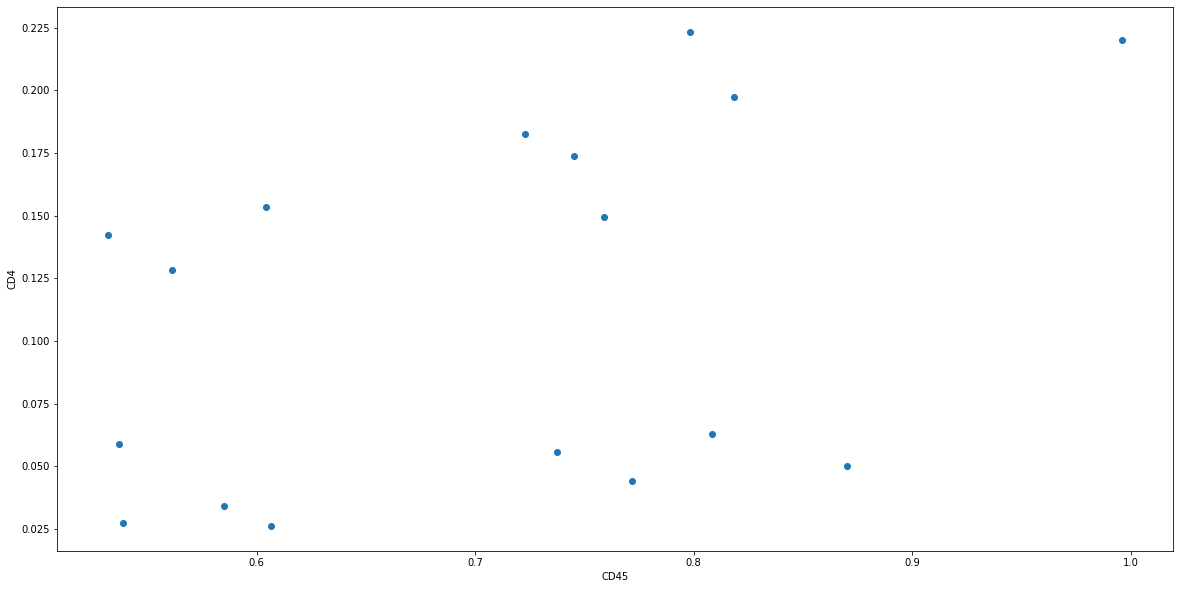

CD45_CD8 -- neg: 0.0; pos: 0.17647058823529413


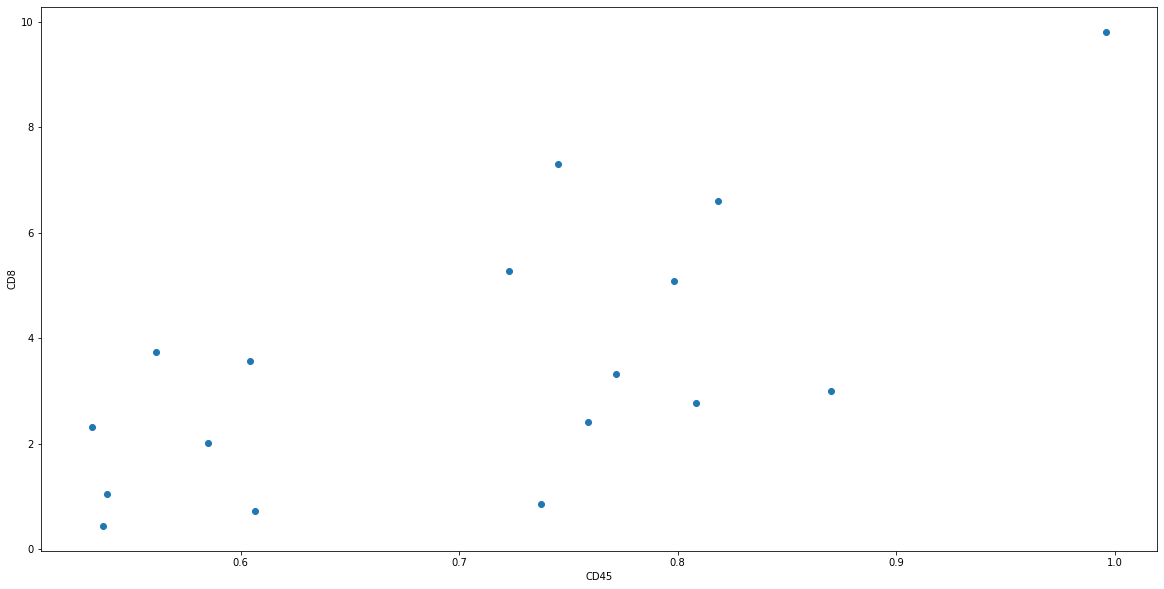

CD45_CD11b -- neg: 0.0; pos: 0.11764705882352941


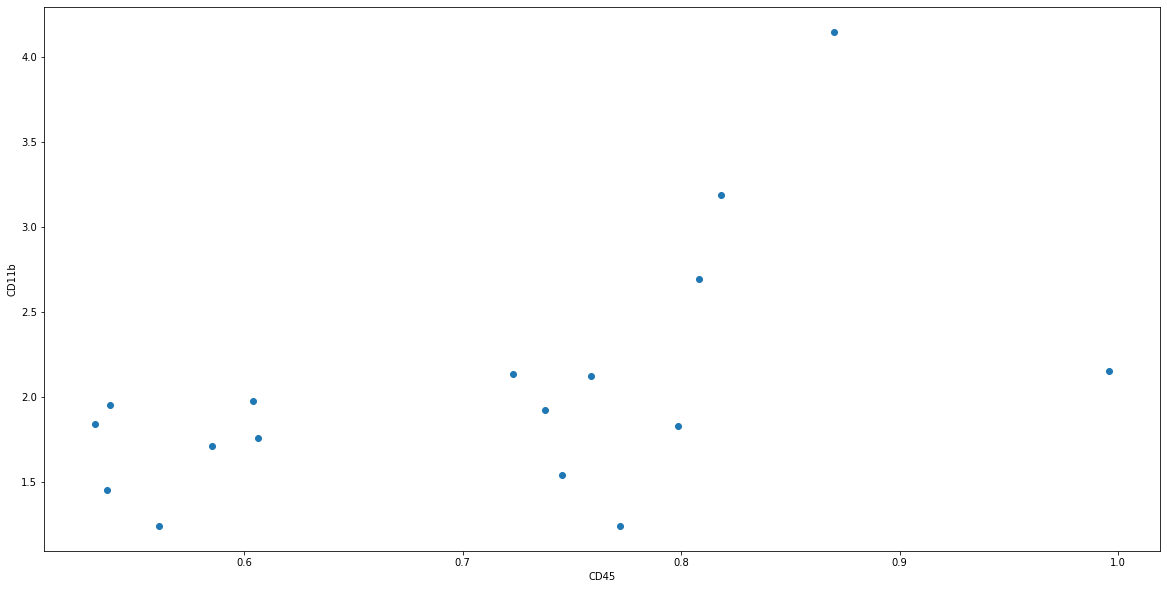

CD45_CD19 -- neg: 0.11764705882352941; pos: 0.0


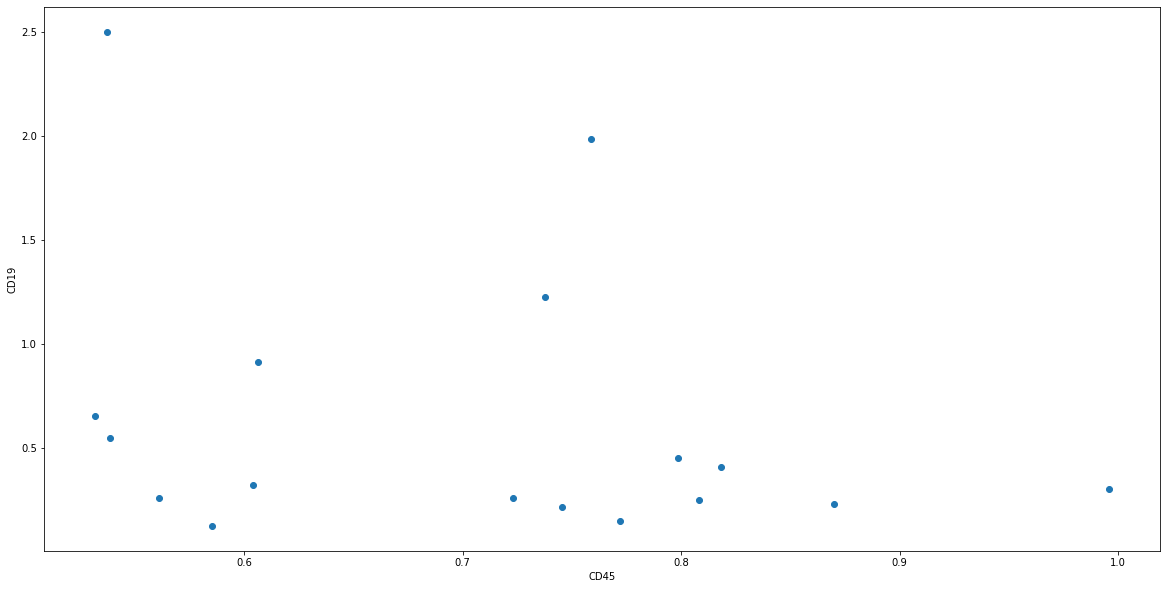

CD45_CD28 -- neg: 0.0; pos: 0.17647058823529413


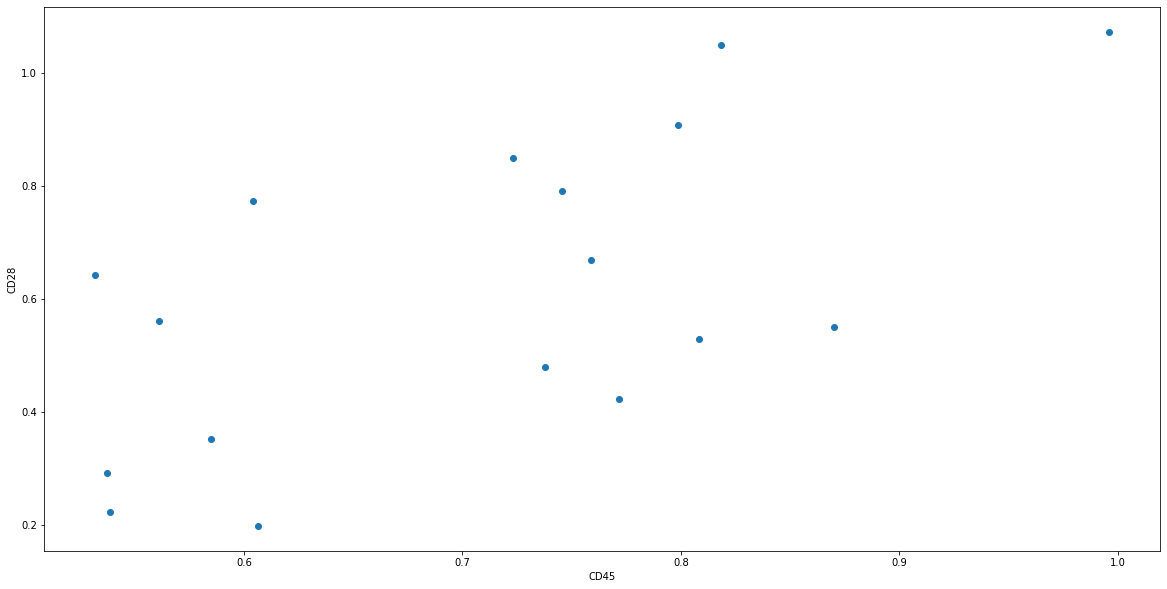

CD45_CD68 -- neg: 0.0; pos: 0.11764705882352941


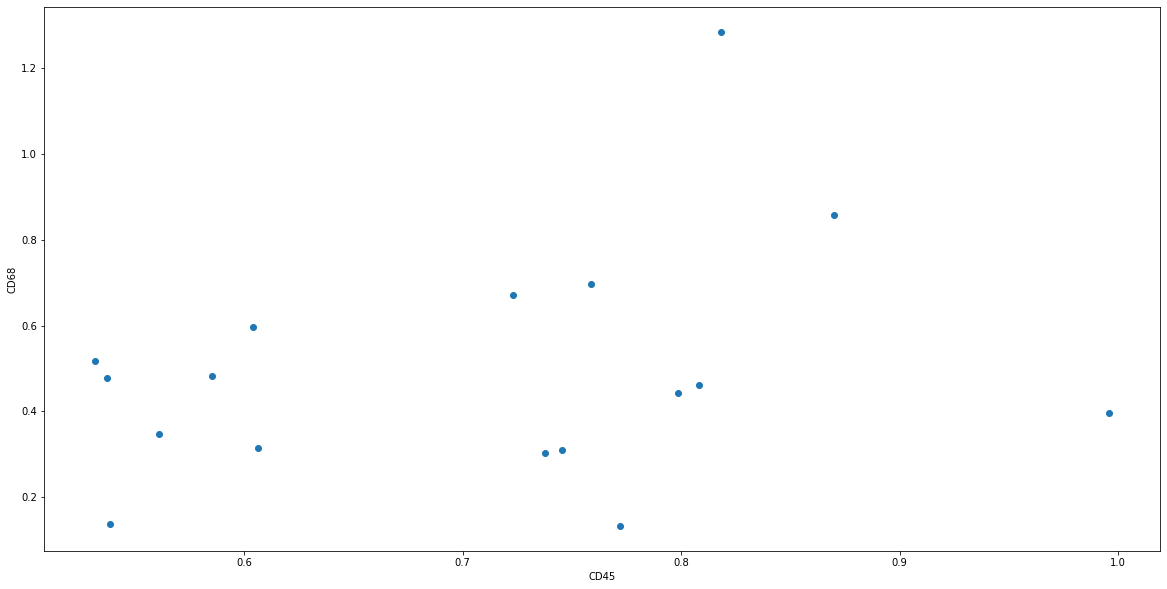

CD4_CD8 -- neg: 0.0; pos: 0.29411764705882354


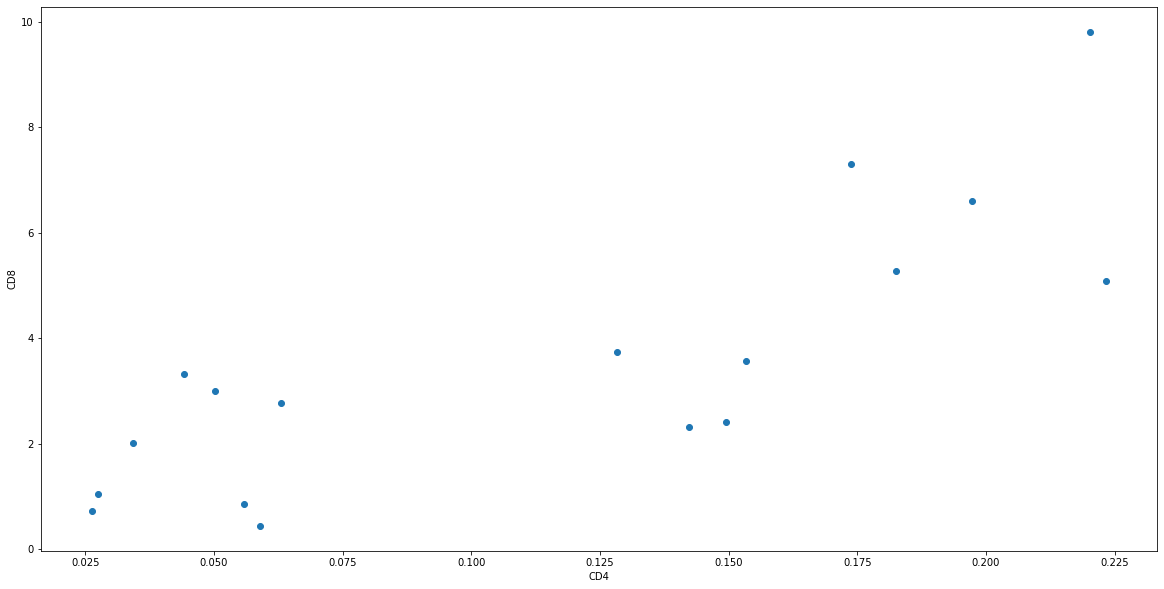

CD4_CD28 -- neg: 0.0; pos: 0.4117647058823529


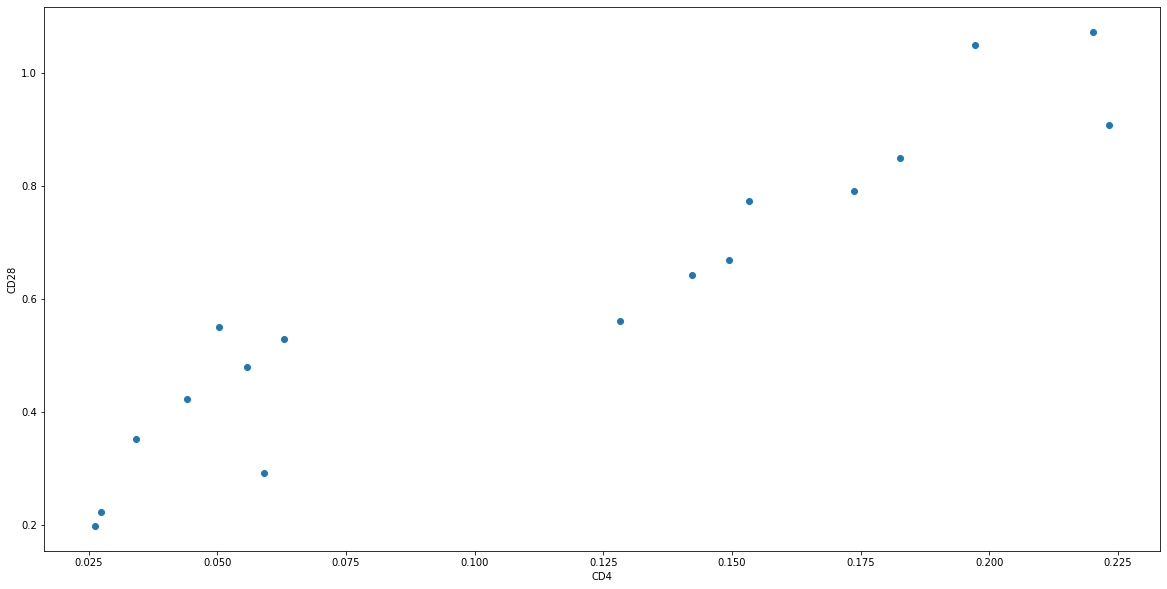

CD8_CD28 -- neg: 0.0; pos: 0.35294117647058826


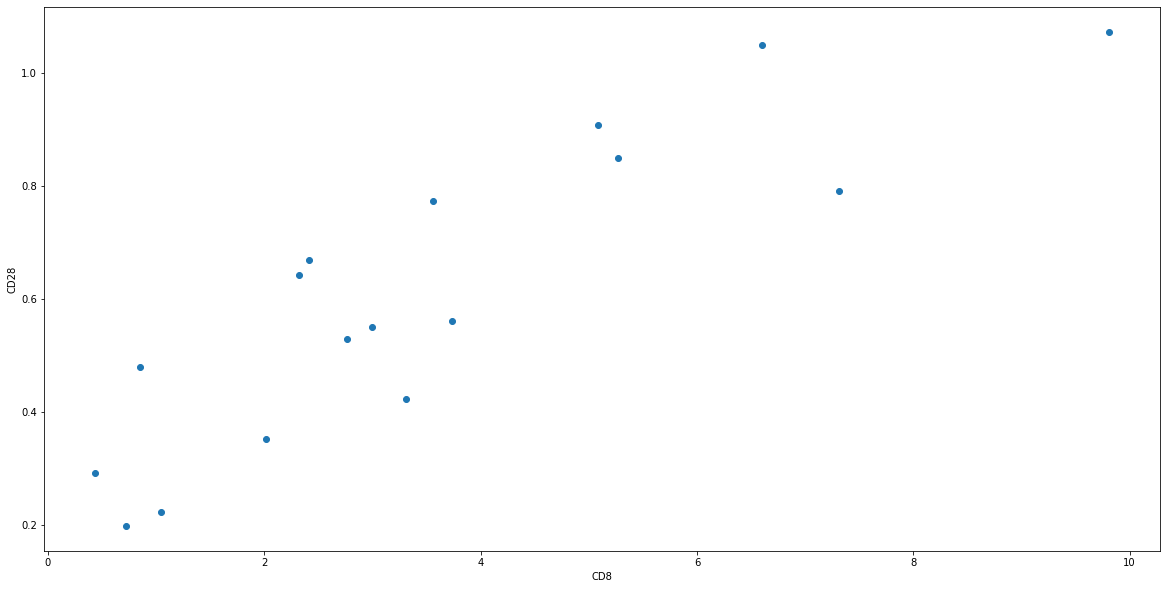

Stroma_CD31 -- neg: 0.0; pos: 0.11764705882352941


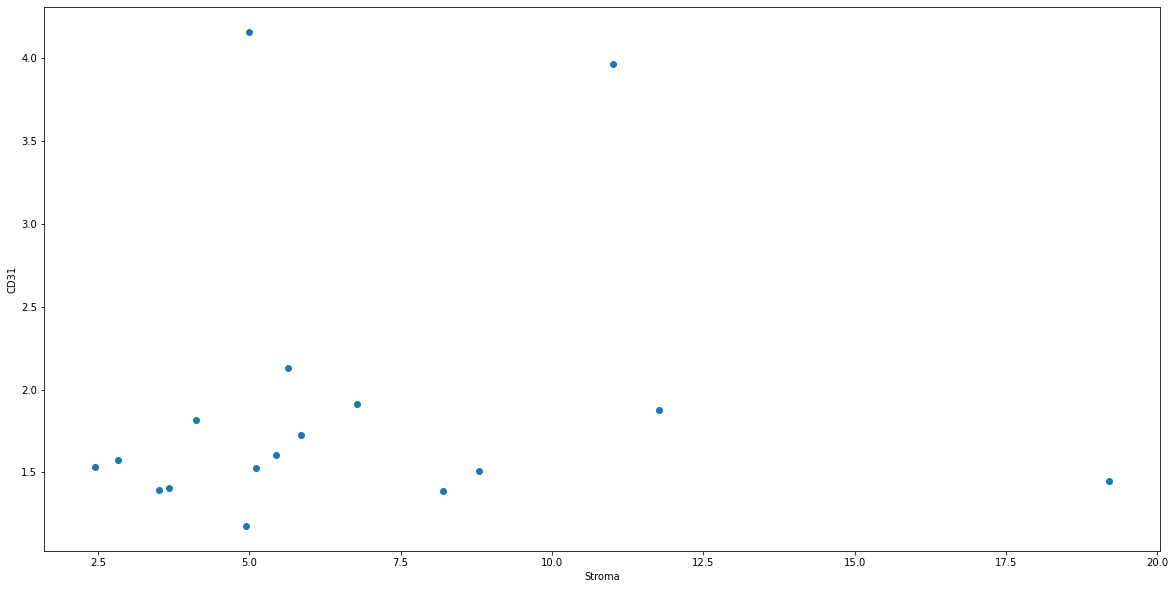

Stroma_Epithelium -- neg: 0.058823529411764705; pos: 0.0


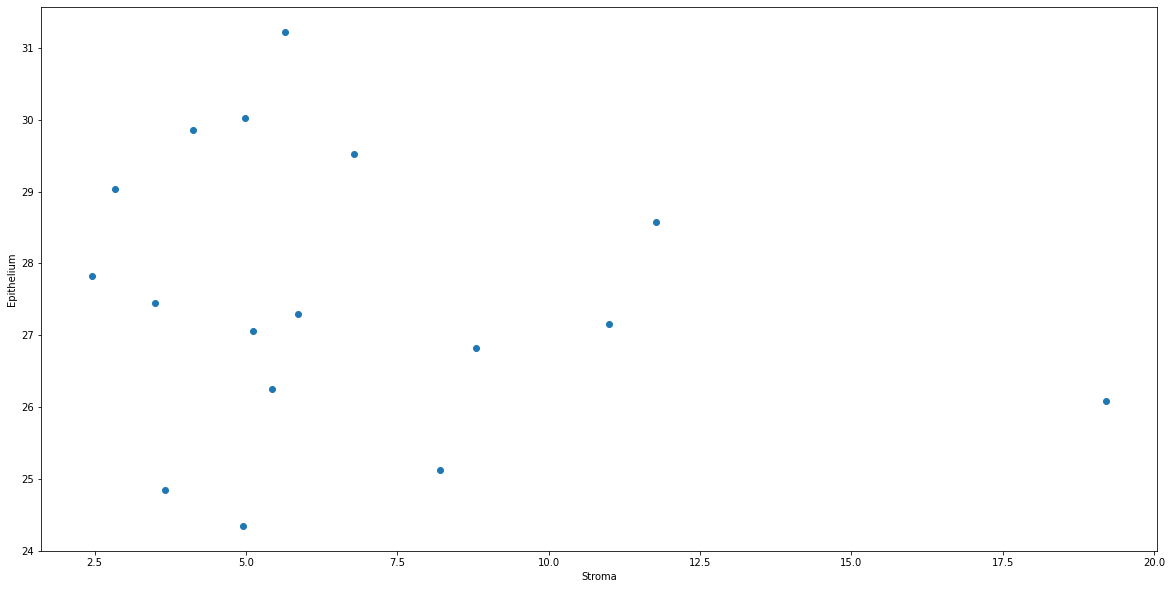

Epithelium_CD4 -- neg: 0.0; pos: 0.0


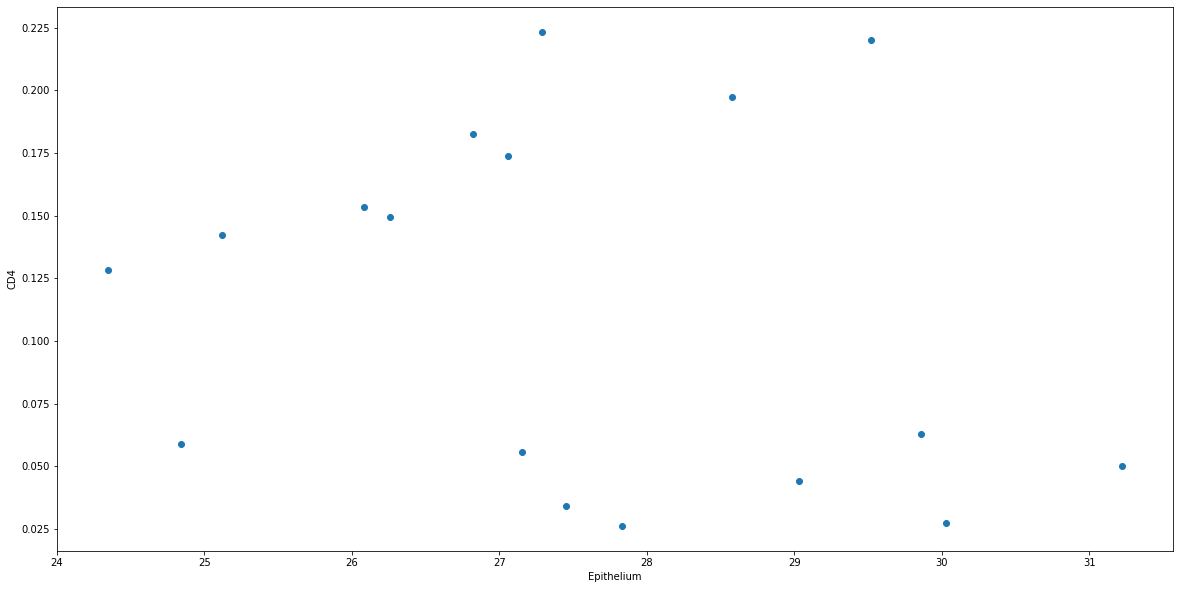

Epithelium_CD8 -- neg: 0.0; pos: 0.058823529411764705


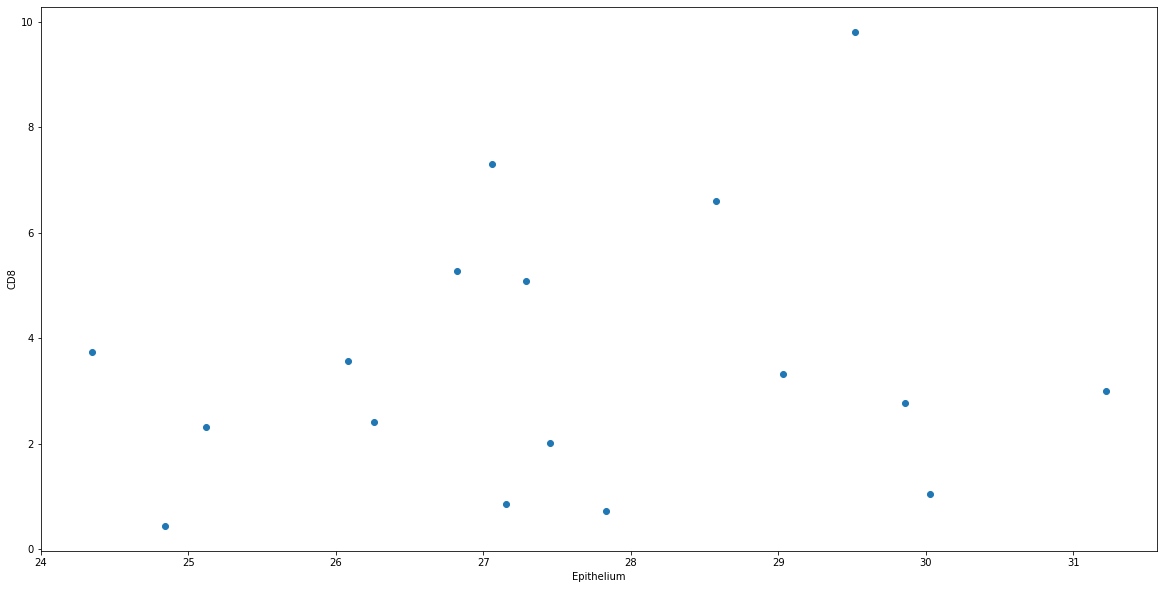

Epithelium_CD11b -- neg: 0.0; pos: 0.11764705882352941


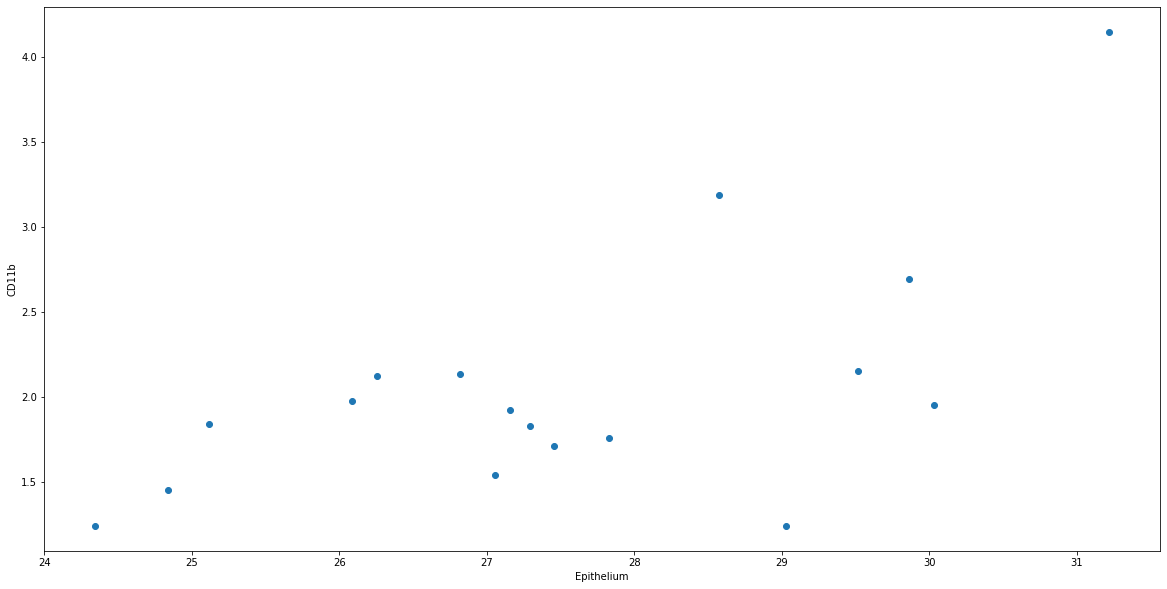

Epithelium_CD31 -- neg: 0.0; pos: 0.11764705882352941


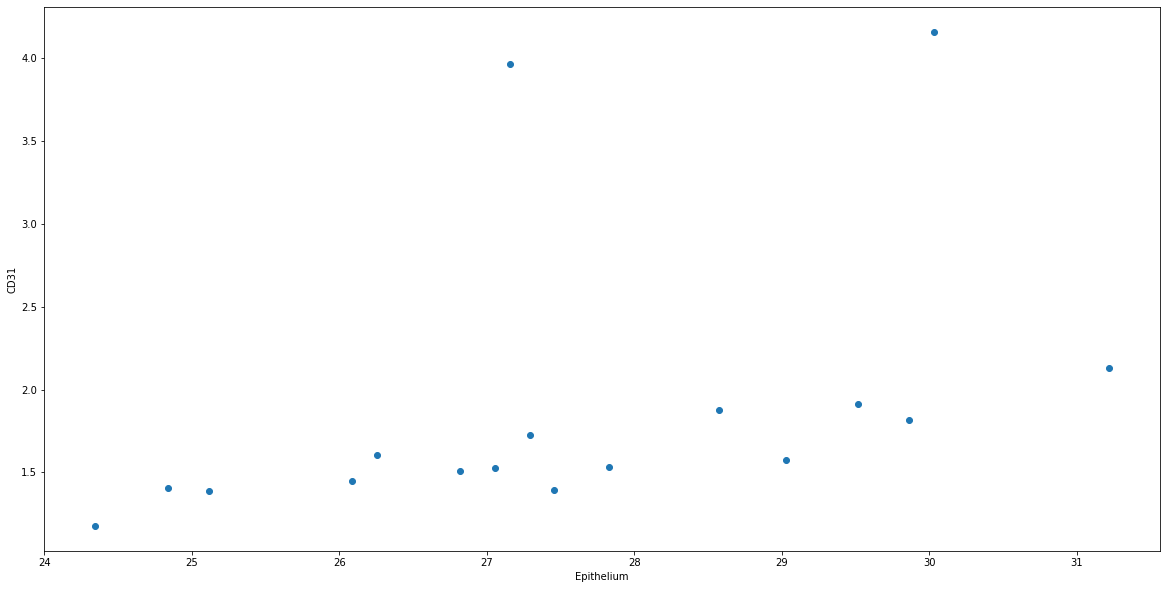

Epithelium_CD19 -- neg: 0.11764705882352941; pos: 0.0


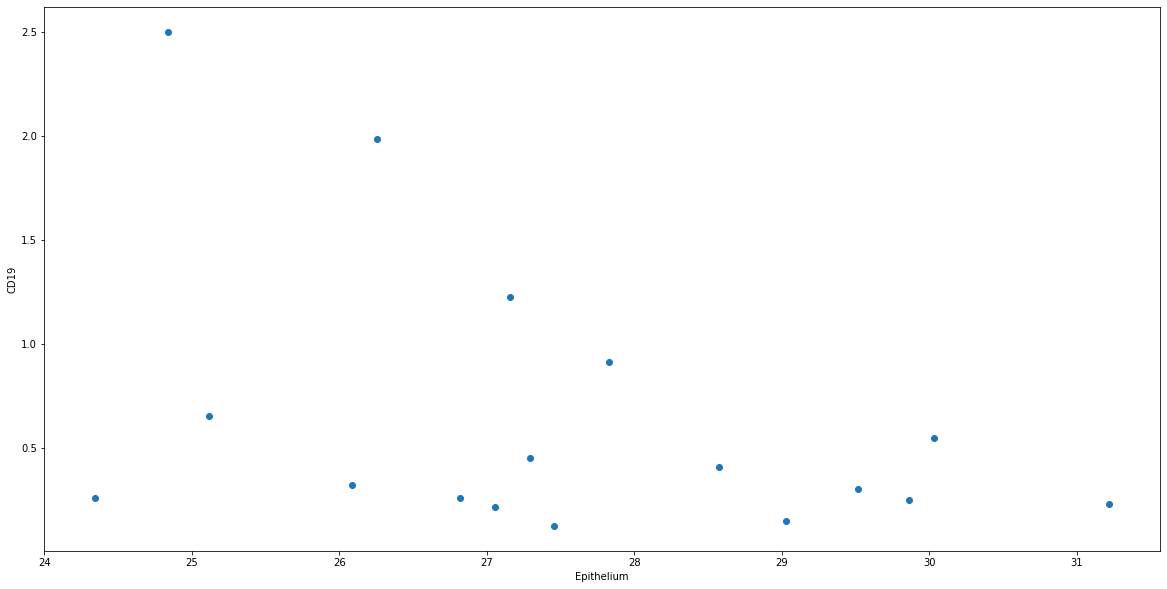

Epithelium_CD45 -- neg: 0.0; pos: 0.23529411764705882


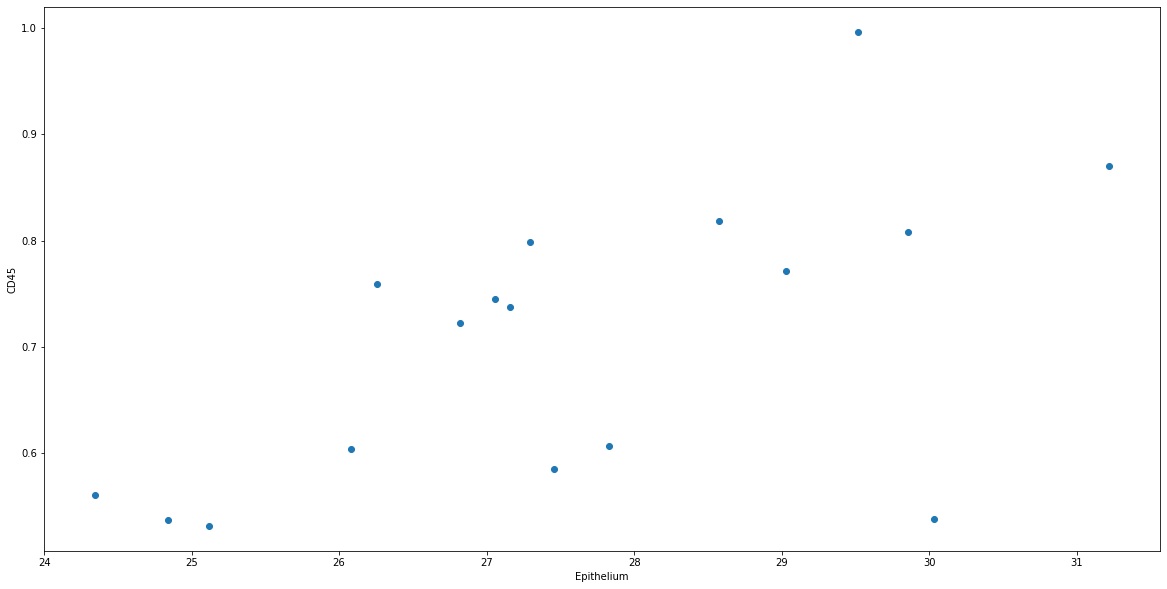

In [12]:
for pair in pairs:
    
    x_name = pair[0]; y_name = pair[1]
    x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])

    ## case 1: bottom right
    bot_right = sum((x > thresholds[x_name][1]) & (y < thresholds[y_name][0]))

    ## case 2: top left
    top_left = sum((x < thresholds[x_name][0]) & (y > thresholds[y_name][1]))

    ## case 3: bottom left
    bot_left = sum((x < thresholds[x_name][0]) & (y < thresholds[y_name][0]))

    ## case 4: top left
    top_right = sum((x > thresholds[x_name][1]) & (y > thresholds[y_name][1]))
    
    ## negative case:
    neg_score = (bot_right + top_left)/len(x)

    ## postive case:
    pos_score = (bot_left + top_right)/len(x)
    
    print("{}_{} -- neg: {}; pos: {}".format(x_name, y_name, neg_score, pos_score))
    
    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()